# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source:
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [35]:
import pandas as pd

# Direct CSV file path
path_to_file = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv"

# Read the dataset
df = pd.read_csv(path_to_file)


#### Display the top 5 rows in the data

In [36]:
# Display the top 5 rows of the data
first_5_rows = df.head(5)
print(first_5_rows)


   FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-01-02 05:22:33  33.93911   
1   NaN    NaN            NaN        Albania  2021-01-02 05:22:33  41.15330   
2   NaN    NaN            NaN        Algeria  2021-01-02 05:22:33  28.03390   
3   NaN    NaN            NaN        Andorra  2021-01-02 05:22:33  42.50630   
4   NaN    NaN            NaN         Angola  2021-01-02 05:22:33 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953      52513    2201      41727    8585  Afghanistan   
1  20.168300      58316    1181      33634   23501      Albania   
2   1.659600      99897    2762      67395   29740      Algeria   
3   1.521800       8117      84       7463     570      Andorra   
4  17.873900      17568     405      11146    6017       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     134.896578             4.191343  
1    2026.409062             2.025173  
2 

#### Show the information of the dataset

In [37]:
import pandas as pd
from IPython.display import display

# Display information about the dataset
df_info = df.info()

# Display the information using display()
display(df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


None

#### Show the sum of missing values of features in the dataset

In [38]:
import pandas as pd
from IPython.display import display

# Calculate the sum of missing values in the dataset
missing_values_sum = df.isnull().sum().reset_index()
missing_values_sum.columns = ['Column', 'Missing Values']

# Display the table
display(missing_values_sum)


,Column,Missing Values
0,FIPS,746
1,Admin2,741
2,Province_State,178
3,Country_Region,0
4,Last_Update,0
5,Lat,89
6,Long_,89
7,Confirmed,0
8,Deaths,0
9,Recovered,0


### Question 2

#### Show the number of Confirmed cases by Country

In [39]:
import pandas as pd
from IPython.display import display

# Group the data by 'Country_Region' and sum the 'Confirmed' cases for each country
confirmed_by_country = df.groupby('Country_Region')['Confirmed'].sum().reset_index()

# Rename the columns for clarity
confirmed_by_country.columns = ['Country', 'Confirmed Cases']

# Display the table
display(confirmed_by_country)


,Country,Confirmed Cases
0,Afghanistan,52513
1,Albania,58316
2,Algeria,99897
3,Andorra,8117
4,Angola,17568
...,...,...
195,West Bank and Gaza,139223
196,Winter Olympics 2022,0
197,Yemen,2101
198,Zambia,20997


#### Show the number of Deaths by Country

In [40]:
import pandas as pd
from IPython.display import display

# Group the data by 'Country_Region' and sum the 'Deaths' for each country
deaths_by_country = df.groupby('Country_Region')['Deaths'].sum()

# Create a new DataFrame to display the number of deaths by country
deaths_by_country_df = pd.DataFrame(deaths_by_country)

# Reset the index to have 'Country_Region' as a regular column
deaths_by_country_df.reset_index(inplace=True)

# Rename the columns for clarity
deaths_by_country_df.columns = ['Country', 'Deaths']

# Display the DataFrame
display(deaths_by_country_df)


,Country,Deaths
0,Afghanistan,2201
1,Albania,1181
2,Algeria,2762
3,Andorra,84
4,Angola,405
...,...,...
195,West Bank and Gaza,1418
196,Winter Olympics 2022,0
197,Yemen,610
198,Zambia,390


#### Show the number of Recovered cases by Country

In [41]:
import pandas as pd
from IPython.display import display

# Group the data by 'Country_Region' and sum the 'Recovered' cases for each country
recovered_by_country = df.groupby('Country_Region')['Recovered'].sum().reset_index()

# Rename the columns for clarity
recovered_by_country.columns = ['Country', 'Recovered Cases']

# Display the table
display(recovered_by_country)


,Country,Recovered Cases
0,Afghanistan,41727
1,Albania,33634
2,Algeria,67395
3,Andorra,7463
4,Angola,11146
...,...,...
195,West Bank and Gaza,118926
196,Winter Olympics 2022,0
197,Yemen,1396
198,Zambia,18773


#### Show the number of Active Cases by Country

In [42]:
import pandas as pd
from IPython.display import display

# Calculate the number of active cases by subtracting deaths and recovered from confirmed cases
df['Active Cases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# Group the data by 'Country_Region' and sum the 'Active Cases' for each country
active_cases_by_country = df.groupby('Country_Region')['Active Cases'].sum().reset_index()

# Rename the columns for clarity
active_cases_by_country.columns = ['Country', 'Active Cases']

# Display the table
display(active_cases_by_country)



,Country,Active Cases
0,Afghanistan,8585
1,Albania,23501
2,Algeria,29740
3,Andorra,570
4,Angola,6017
...,...,...
195,West Bank and Gaza,18879
196,Winter Olympics 2022,0
197,Yemen,95
198,Zambia,1834


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [43]:
import pandas as pd

# Sort the data by 'Country_Region' and 'Last_Update' in descending order
df_sorted = df.sort_values(by=['Country_Region', 'Last_Update'], ascending=[True, False])

# Keep only the rows with the most recent data for each country
latest_data = df_sorted.drop_duplicates(subset='Country_Region', keep='first')

# Select the columns for confirmed, deaths, recovered, and active cases
latest_data = latest_data[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active Cases']]

# Rename the columns for clarity
latest_data.columns = ['Country', 'Confirmed Cases', 'Deaths', 'Recovered Cases', 'Active Cases']

# Reset the index for the DataFrame
latest_data.reset_index(drop=True, inplace=True)

# Display the DataFrame
latest_data


,Country,Confirmed Cases,Deaths,Recovered Cases,Active Cases
0,Afghanistan,52513,2201,41727,8585
1,Albania,58316,1181,33634,23501
2,Algeria,99897,2762,67395,29740
3,Andorra,8117,84,7463,570
4,Angola,17568,405,11146,6017
...,...,...,...,...,...
195,West Bank and Gaza,139223,1418,118926,18879
196,Winter Olympics 2022,0,0,0,0
197,Yemen,2101,610,1396,95
198,Zambia,20997,390,18773,1834


### Question 3

### Show the countries with no recovered cases

In [44]:
from IPython.display import display

# Filter countries with no recovered cases
countries_without_recovery = df[df['Recovered'] == 0]

# Select the columns "Country_Region" and "Recovered"
countries_without_recovery = countries_without_recovery[['Country_Region', 'Recovered']]

# Show countries with no recovered cases
display(countries_without_recovery)


,Country_Region,Recovered
9,Australia,0
23,Belgium,0
24,Belgium,0
25,Belgium,0
26,Belgium,0
...,...,...
4006,Ukraine,0
4007,Nauru,0
4008,New Zealand,0
4009,Tuvalu,0


#### Show the countries with no confirmed cases

In [45]:
import pandas as pd

# Filter the data to select countries with zero recovered cases
countries_with_zero_recovery = df[df['Recovered'] == 0]

# Select the unique 'Country_Region' values from the filtered data
countries = countries_with_zero_recovery['Country_Region'].unique()

# Create a DataFrame to display the countries with zero recovered cases
zero_recovery_countries_df = pd.DataFrame({'Country': countries})

# Display the DataFrame
zero_recovery_countries_df


,Country
0,Australia
1,Belgium
2,Canada
3,Colombia
4,Germany
5,India
6,Mexico
7,Netherlands
8,Peru
9,Serbia


#### Show the countries with no deaths

In [46]:
import pandas as pd

# Filter the data to select countries with zero deaths
countries_with_zero_deaths = df[df['Deaths'] == 0]

# Select the unique 'Country_Region' values from the filtered data
countries = countries_with_zero_deaths['Country_Region'].unique()

# Create a DataFrame to display the countries with zero deaths
zero_deaths_countries_df = pd.DataFrame({'Country': countries})

# Add a new column 'Deaths' with values set to 0
zero_deaths_countries_df['Deaths'] = 0

# Display the DataFrame
zero_deaths_countries_df


,Country,Deaths
0,Australia,0
1,Belgium,0
2,Bhutan,0
3,Cambodia,0
4,Canada,0
5,China,0
6,Colombia,0
7,Denmark,0
8,Dominica,0
9,France,0


In [47]:
import pandas as pd

# Filter the data to select countries with zero deaths
countries_with_zero_deaths = df[df['Deaths'] == 0]

# Select the desired columns for the filtered data
filtered_data = countries_with_zero_deaths[['Country_Region', 'Confirmed', 'Deaths', 'Recovered']]

# Display the filtered data
filtered_data


,Country_Region,Confirmed,Deaths,Recovered
10,Australia,75,0,71
23,Belgium,79680,0,0
24,Belgium,81557,0,0
25,Belgium,65260,0,0
26,Belgium,49270,0,0
...,...,...,...,...
4006,Ukraine,0,0,0
4007,Nauru,0,0,0
4008,New Zealand,0,0,0
4009,Tuvalu,0,0,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [48]:
import pandas as pd

# Sort the data by 'Confirmed' cases in descending order
top_10_countries = df.sort_values(by='Confirmed', ascending=False).head(10)

# Select the desired columns
top_10_countries = top_10_countries[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered']]

# Display the DataFrame
top_10_countries


,Country_Region,Last_Update,Confirmed,Deaths,Recovered
214,France,2021-01-02 05:22:33,2636045,64399,170896
647,Turkey,2021-01-02 05:22:33,2220855,21093,2114760
3956,United Kingdom,2021-01-02 05:22:33,2190702,81593,0
267,India,2021-01-02 05:22:33,1935636,49580,1828546
6,Argentina,2021-01-02 05:22:33,1629594,43319,1426676
65,Brazil,2021-01-02 05:22:33,1466191,46775,1287986
487,Poland,2021-01-02 05:22:33,1305774,28956,1046281
285,Iran,2021-01-02 05:22:33,1231429,55337,995570
591,South Africa,2021-01-02 05:22:33,1073887,28887,887701
262,India,2021-01-02 05:22:33,920373,12096,896116


#### Show the Top 10 Countries with Active cases

In [49]:
import pandas as pd

# Calculate the number of active cases by subtracting deaths and recovered from confirmed cases
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# Sort the data by 'Active' cases in descending order
top_10_active_countries = df.sort_values(by='Active', ascending=False).head(10)

# Select the desired columns
top_10_active_countries = top_10_active_countries[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active']]

# Display the DataFrame
top_10_active_countries


,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active
214,France,2021-01-02 05:22:33,2636045,64399,170896,2400750
3956,United Kingdom,2021-01-02 05:22:33,2190702,81593,0,2109109
857,US,2021-01-02 05:22:33,790582,10552,0,780030
474,Peru,2021-01-02 05:22:33,449514,42170,0,407344
1276,US,2021-01-02 05:22:33,393652,7860,0,385792
607,Spain,2021-01-02 05:22:33,399499,11828,40736,346935
583,Serbia,2021-01-02 05:22:33,339997,3250,0,336747
602,Spain,2021-01-02 05:22:33,356724,8723,26203,321798
753,US,2021-01-02 05:22:33,325404,5196,0,320208
391,Mexico,2021-01-02 05:22:33,334137,16873,0,317264


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [50]:
import matplotlib.pyplot as plt

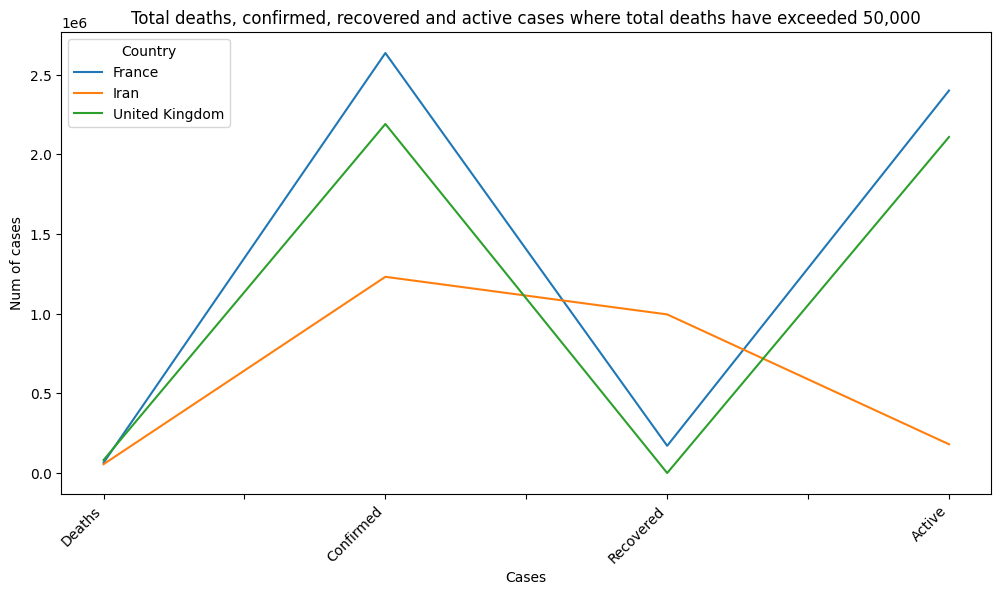

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of active cases by subtracting deaths and recovered from confirmed cases
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# Filter the data to select countries with more than 50,000 deaths
countries_with_over_50000_deaths = df[df['Deaths'] > 50000]

# Select the desired columns
data_to_plot = countries_with_over_50000_deaths[['Country_Region', 'Deaths', 'Confirmed', 'Recovered', 'Active']]

# Set the 'Country_Region' column as the index for plotting
data_to_plot.set_index('Country_Region', inplace=True)

# Transpose the DataFrame for a line plot
data_to_plot = data_to_plot.T

# Plot the data as a line chart
data_to_plot.plot(kind='line', figsize=(12, 6))
plt.title('Total deaths, confirmed, recovered and active cases where total deaths have exceeded 50,000')
plt.xlabel('Cases')
plt.ylabel('Num of cases')
plt.legend(title='Country', loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


### Question 6

### Plot Province/State wise Deaths in USA

In [52]:
import plotly.express as px

In [53]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [54]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [55]:
import plotly.express as px
import pandas as pd

# Filter the data for United States (USA)
usa_data = covid_data[covid_data['Country_Region'] == 'US']

# Create a bar chart for deaths by province or state in the USA
fig = px.bar(usa_data, x='Province_State', y='Deaths', title='Muertes por Provincia/Estado en USA')
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [56]:
import plotly.express as px

# Filtrar los datos para Estados Unidos (USA)
usa_data = covid_data[covid_data['Country_Region'] == 'US'].copy()

# Calculate active cases by subtracting deaths and recovered from confirmed cases
usa_data.loc['Active'] = usa_data['Confirmed'] - usa_data['Deaths'] - usa_data['Recovered']

# Create a bar chart for active cases by province or state in the USA
fig = px.bar(usa_data, x='Province_State', y='Active', title='Casos Activos por Provincia/Estado en EE. UU.')
fig.show()


### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [57]:
import plotly.express as px
import pandas as pd

# Read the data
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

# Filter the data for the United States (USA)
usa_data = covid_data[covid_data['Country_Region'] == 'US']

# Create a bar chart for confirmed cases by Province/State in the USA
fig = px.bar(usa_data, x='Province_State', y='Confirmed', title='Confirmed Cases by Province/State in the USA')
fig.show()


### Question 9

### Plot Worldwide Confirmed Cases over time

In [74]:
import plotly.express as px
import plotly.io as pio

In [77]:

# Melt the data to transform it into long format
melted_data = covid_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')

# Group the data by Date and sum the Confirmed cases
worldwide_data = melted_data.groupby('Date')['Confirmed'].sum().reset_index()

# Create a line chart for worldwide confirmed cases over time
fig = px.line(worldwide_data, x='Date', y='Confirmed', title='Worldwide Confirmed Cases Over Time')
fig.show()

# Save the plot as an HTML file (optional)
pio.write_html(fig, file='worldwide_confirmed_cases_over_time.html')


ValueError: value_name (Confirmed) cannot match an element in the DataFrame columns.